In [49]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import quad
from scipy.optimize import curve_fit
import io
import pandas as pd

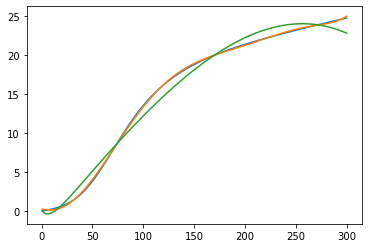

In [46]:
def cPPt(T):
    return 5.81 + 1.26e-3 * T+0.06e5/T**2

class cPHill:
    def __init__(self, Cvmax, n, K, m):
        self.Cvmax = Cvmax
        self.n = n
        self.K = K
        self.m = m
        
    def __call__(self, T):
        return self.Cvmax*T**self.n/(self.K + T**self.n) + self.m*T

Li = cPHill(16.66598867, 3.392136047, 3322089, 0.027653496)
    
T100 = np.linspace(0.5, 300, 100)
cP100 = Li(T100)

def func(T, Tc, A, b, c, d):
    return A*(1-np.exp(-T/Tc)) + b*300/T + c*(T/300) + d*(T/300)**3 


p3 = np.polyfit(T100, cP100, 7)

cP100_fit = np.polyval(p3, T100)

popt, pcov = curve_fit(func, T100, cP100, p0=[100, 30, 0, 0, 0])

plt.plot(T100,cP100)
plt.plot(T100,cP100_fit)
plt.plot(T100, func(T100, *popt))

In [33]:
quad(Na, 0, 300)

(4656.038934446886, 6.927364824108636e-08)

In [17]:
quad(lambda T: Li(T)/T, 0, 298)

(29.47805112691593, 1.6688118997225268e-07)

In [54]:
s = io.StringIO("""
T	cP
10	0.000018
15	0.000053
20	0.000122
25	0.000235
30	0.000404
40	0.000979
50	0.00195
60	0.00341
70	0.00592
80	0.00934
90	0.014
100	0.0204
120	0.039
140	0.0658
160	0.102
180	0.145
200	0.195
220	0.252
240	0.314
260	0.38
280	0.447
300	0.518""")
df = pd.read_table(s)
T = df['T'].values
cP = df['cP'].values

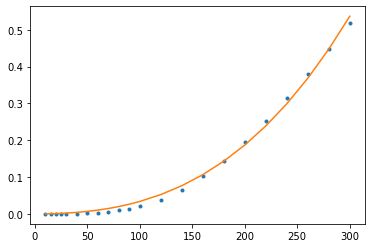

In [108]:
popt, pcov = curve_fit(lambda x, a, b: a*(x/100)**2+ b*(x/100)**3, T, cP)
cP_fit = popt[0] * (T/100)**2 + popt[1]*(T/100)**3
plt.plot(T, cP, '.')
plt.plot(T, cP_fit, '-')

In [109]:
popt

array([0.02111814, 0.0128394 ])

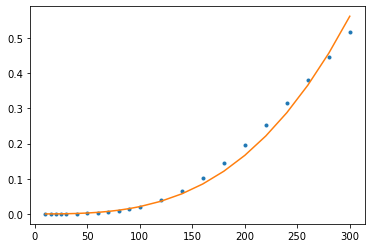

In [94]:
popt, pcov = curve_fit(lambda x, a: a*(x/100)**3, T, cP)
cP_fit =  popt[0]*(T/100)**3
plt.plot(T, cP, '.')
plt.plot(T, cP_bfit, '-')

In [96]:
popt

array([0.02111814, 0.0128394 ])

In [85]:
p3 = np.polyfit(T, cP,3 )
p3

array([-1.09749719e-09,  8.48631078e-06, -7.42194929e-04,  1.28402129e-02])

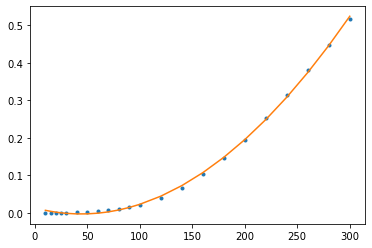

In [68]:
plt.plot(T, cP, '.')
plt.plot(T, np.polyval(p3, T), '-')

In [73]:
def diamond(T):
    return np.polyval(p3, T)*12.011

In [100]:
quad(lambda T: diamond(T)/T, 1, 298)

(2.6405425397669386, 4.0177892401164025e-09)

In [103]:
def d2(T):
    popt = np.array([0.02111814, 0.0128394 ])*12.011
    return popt[0] * (T/100)**2 + popt[1]*(T/100)**3

In [111]:
quad(lambda T: d2(T)/T, 0, 298.15)

(2.489798417740829, 2.7642315300511522e-14)

In [116]:
def d3(T):
    return (2.111e-6*T**2 + 1.284e-8*T**3)*12.011

In [117]:
quad(lambda T: d2(T), 0, 298.15)

(528.7390862615181, 5.870183075868042e-12)

In [118]:
quad(lambda T: d3(T), 0, 298.15)

(528.666948231888, 5.869382182853578e-12)

In [119]:
quad(lambda T: d3(T)/T, 0, 298.15)

(2.4894275311747527, 2.76381976324597e-14)

In [ ]:
"""T	cP
10	0.000018
15	0.000053
20	0.000122
25	0.000235
30	0.000404
40	0.000979
50	0.00195
60	0.00341
70	0.00592
80	0.00934
90	0.014
100	0.0204
120	0.039
140	0.0658
160	0.102
180	0.145
200	0.195
220	0.252
240	0.314
260	0.38
280	0.447
300	0.518"""

In [166]:
V1=298*0.1*0.083145/(5.86)
V2 = 2.189
w = -(V2-V1)*1.01*100
print(f"{w=:.2f} J")
Tf = 1.01*V2/(0.1*0.083145)
print(f"{Tf=:.3f} K")
cV = 0.1*55.61
dU = cV * (Tf - 298)
print(f"{dU=:.2f} J")

w=-178.38 J
Tf=265.908 K
dU=-178.46 J


In [178]:
R = 8.314
dS1 = -R*np.log(1.01/5.86)

In [177]:
cP = 63.92
dS2 = cP * np.log(Tf/298)

In [180]:
dS = 0.1*(dS1+dS2)

In [181]:
d

0.733436592924591

In [134]:
deltaT=(268.47-298)

In [136]:
cV*deltaT

-164.21632999999986

-174.4478204778157

5.2271336615040855